In [1]:
import requests
import pandas as pd
from requests.auth import HTTPBasicAuth
import matplotlib.pyplot as plt
from datetime import datetime
import os
import sys
sys.path.append(os.path.abspath('../'))
from dotenv import load_dotenv
load_dotenv()

True

In [2]:
username = 'phumiwit_pr'
password = os.getenv('PASSWORD')

MEMORY USAGE

In [3]:
url = "http://10.10.10.200:7180/api/v33/timeseries"

# example 
# 2023-11-28T00:00:00.000Z  2023-12-28T00:00:00.000Z
start = input("please enter start mounth format example yyyy-hh-ddTHH:mm:ss.SSS :")
end = input("please enter end mounth format example yyyy-hh-ddTHH:mm:ss.SSS :")


params = {
    "contentType": "application/json",
    "from": start,
    "desiredRollup": "DAILY",
    "mustUseDesiredRollup": True,
    "query": "select cpu_percent_across_hosts where category = CLUSTER",
    "to": end,
}


response = requests.get(url, params=params,auth=HTTPBasicAuth(username, password))
if response.status_code == 200:
    data = response.json()

    time_series_data = data['items'][0]['timeSeries'][0]['data']
    
    data_list = [
    {
        'timestamp': point['timestamp'],
        'max': point['aggregateStatistics']['max'],
        'mean': point['aggregateStatistics']['mean'],
    }
    for point in time_series_data
    
]   
    df_cpu_usage_compare_date = pd.DataFrame(data_list)
    
   
else:
    print(f"Error: {response.status_code} - {response.text}")

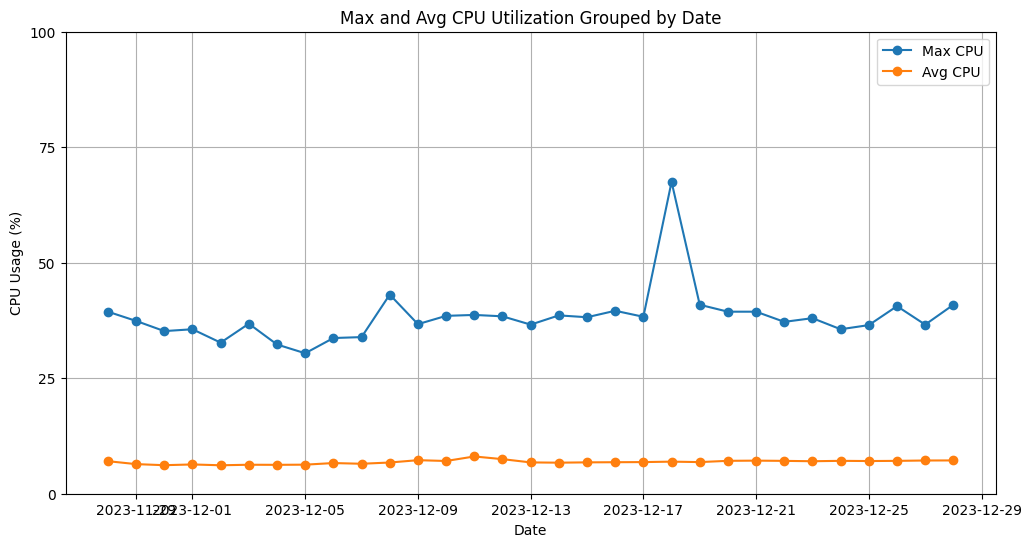

In [4]:
df_cpu_usage_compare_date['timestamp'] = pd.to_datetime(df_cpu_usage_compare_date['timestamp'])
df_cpu_usage_compare_date['date'] = df_cpu_usage_compare_date['timestamp'].dt.date

# find unique_date
unique_dates = df_cpu_usage_compare_date['date'].drop_duplicates()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(unique_dates, df_cpu_usage_compare_date['max'], marker='o', linestyle='-', label='Max CPU')
plt.plot(unique_dates, df_cpu_usage_compare_date['mean'], marker='o', linestyle='-', label='Avg CPU')
plt.title('Max and Avg CPU Utilization Grouped by Date')
plt.xlabel('Date')
plt.ylabel('CPU Usage (%)')
plt.legend()
plt.grid(True)
plt.yticks(range(0, 101, 25))
plt.legend()
plt.grid(True)
plt.show()

Extract Summary 
-maxcpuutillization
-maxcpuutillization
-maxmemoryutillzation
-avgcpuutilization
-avgmemoryutillzation
-total_memory_gb

In [77]:
url = "http://10.10.10.200:7180/api/v33/clusters/MAHOLAN_Cluster/utilization"

params = {
   "cluster": "MAHOLAN_Cluster",
   'tenanttype': "POOL",
   "endHourOfDay": "23",
   "from":start,
   "to": end,
   "startHourOfDay": "0",
}

response = requests.get(
    url,
    auth=(username, password),
    params=params
)

if response.status_code == 200:
    data = response.json()
    maxcpuutillization = data['maxCpuUtilization']
    avgcpuutilization = data['avgCpuUtilization'] 
    avgmemoryutillzation = data['avgMemoryUtilization']
    maxmemoryutillzation = data['maxMemoryUtilization']
    total_memory = data['totalMemory']
    total_memory_gb = total_memory / (1024 ** 3)

else:
    print(f"Error: {response.status_code} - {response.text}")

In [34]:
print(f'this is maxcpuutillization : {maxcpuutillization}')
print(f'this is maxmemoryutillzation : {maxmemoryutillzation}')
print(f'this is avgcpuutilization  : {avgcpuutilization}')
print(f'this is avgmemoryutillzation : {avgmemoryutillzation}')
print(f'this is total_memory  : {total_memory_gb}')

this is maxcpuutillization : 67.5
this is maxmemoryutillzation : 41.85219499210983
this is avgcpuutilization  : 6.850013720878127
this is avgmemoryutillzation : 32.10609160198986
this is total_memory  : 439.93549728393555


STATUS CPU

In [ ]:
status_cpu = ''
if avgcpuutilization >= 85:
    status_cpu = 'Critical_Status'
elif avgcpuutilization >= 75:
    status_cpu = 'Warning_Status'
elif avgcpuutilization < 75:
    status_cpu = 'Normal_Status'

print(status_cpu)

STATUS MEMORY

In [ ]:
status_memory = ''
if avgmemoryutillzation >= 85:
    status_memory = 'Critical_Status'
elif avgmemoryutillzation >= 75:
    status_memory = 'Warning_Status'
elif avgmemoryutillzation < 75:
    status_memory = 'Normal_Status'

print(status_memory)

In [12]:


url = "http://10.10.10.200:7180/api/v33/timeseries"

params = {
    "contentType": "application/json",
    "from": start,
    "desiredRollup": "DAILY",
    "mustUseDesiredRollup": True,
    "query": "SELECT 100*total_physical_memory_used_across_hosts/total_physical_memory_total_across_hosts WHERE entityName = '1' AND category = CLUSTER",
    "to": end,
}

response = requests.get(
    url,
    auth=(username, password),
    params=params
)

if response.status_code == 200:
    data = response.json()
    timestamps = []
    values = []
    maxs = []
    means = []

    for item in data["items"]:
        for time_series in item["timeSeries"]:
            for data_point in time_series["data"]:
                timestamp = data_point["timestamp"]
                value = data_point["value"]
                value = data_point["value"]
                # max = data_point["aggregateStatistics"]["max"]
                # mean = data_point["aggregateStatistics"]["mean"]
                timestamps.append(timestamp)
                values.append(value)
           

    # Create a DataFrame
                
    df_memory = pd.DataFrame({
        "timestamp": timestamps,
        "value":values
    })

else:
    print(f"Error: {response.status_code} - {response.text}")


In [13]:
df_memory.head()

,timestamp,value
0,2023-11-28T00:00:00.000Z,31.951367
1,2023-11-29T00:00:00.000Z,32.371638
2,2023-11-30T00:00:00.000Z,32.416157
3,2023-12-01T00:00:00.000Z,32.425852
4,2023-12-02T00:00:00.000Z,32.438619


In [84]:
import pandas as pd
import requests

url = "http://10.10.10.200:7180/api/v33/timeseries"

params = {
    "contentType": "application/json",
    "from": start,
    "desiredRollup": "DAILY",
    "mustUseDesiredRollup": True,
    "query": "SELECT total_physical_memory_used_across_hosts WHERE entityName = '1' AND category = CLUSTER",
    "to": end,
}

response = requests.get(
    url,
    auth=(username, password),
    params=params
)

if response.status_code == 200:
    data = response.json()
    timestamps = []
    values = []
    maxs = []
    means = []

    for item in data["items"]:
        for time_series in item["timeSeries"]:
            for data_point in time_series["data"]:
                timestamp = data_point["timestamp"]
                value = data_point["value"]
                max = data_point["aggregateStatistics"]["max"]
                mean = data_point["aggregateStatistics"]["mean"]
                timestamps.append(timestamp)
                values.append(value)
                maxs.append(max / (1024 ** 3))
                means.append(mean / (1024 ** 3))

    # Create a DataFrame
                
    df_memory = pd.DataFrame({
        "timestamp": timestamps,
        "value": values,
        "max":maxs,
        "mean":means
    })

   
      
   
   

else:
    print(f"Error: {response.status_code} - {response.text}")


In [85]:
df_memory

,timestamp,value,max,mean
0,2023-11-28T00:00:00.000Z,1.509310e+11,142.509853,140.565403
1,2023-11-29T00:00:00.000Z,1.529162e+11,144.553091,142.414325
2,2023-11-30T00:00:00.000Z,1.531265e+11,145.565010,142.610180
3,2023-12-01T00:00:00.000Z,1.531723e+11,144.553040,142.652833
4,2023-12-02T00:00:00.000Z,1.532326e+11,143.876488,142.709002
5,2023-12-03T00:00:00.000Z,1.533196e+11,144.639408,142.790009
6,2023-12-04T00:00:00.000Z,1.536324e+11,144.616787,143.081328
7,2023-12-05T00:00:00.000Z,1.539957e+11,145.492229,143.419655
8,2023-12-06T00:00:00.000Z,1.549785e+11,147.363953,144.335007
9,2023-12-07T00:00:00.000Z,1.586685e+11,273.512730,147.771516


In [86]:
df_percent_max = (df_memory['max'] / total_memory_gb) * 100

In [87]:
df_percent_mean = (df_memory['mean'] / total_memory_gb) * 100

In [88]:
df_percent_max.head(100)

0     32.393352
1     32.857792
2     33.087807
3     32.857780
4     32.703996
5     32.877412
6     32.872271
7     33.071264
8     33.496718
9     62.171098
10    33.820956
11    34.976070
12    34.347363
13    35.038606
14    38.203160
15    38.006008
16    37.830567
17    37.175036
18    38.389941
19    29.495129
20    29.879071
21    30.854401
22    30.253463
23    29.724315
24    30.056250
25    29.924837
26    30.038910
27    29.968686
28    30.855834
29    30.311536
30    30.299031
Name: max, dtype: float64

In [89]:
df_percent_mean.head()

0    31.951367
1    32.371638
2    32.416157
3    32.425852
4    32.438619
Name: mean, dtype: float64

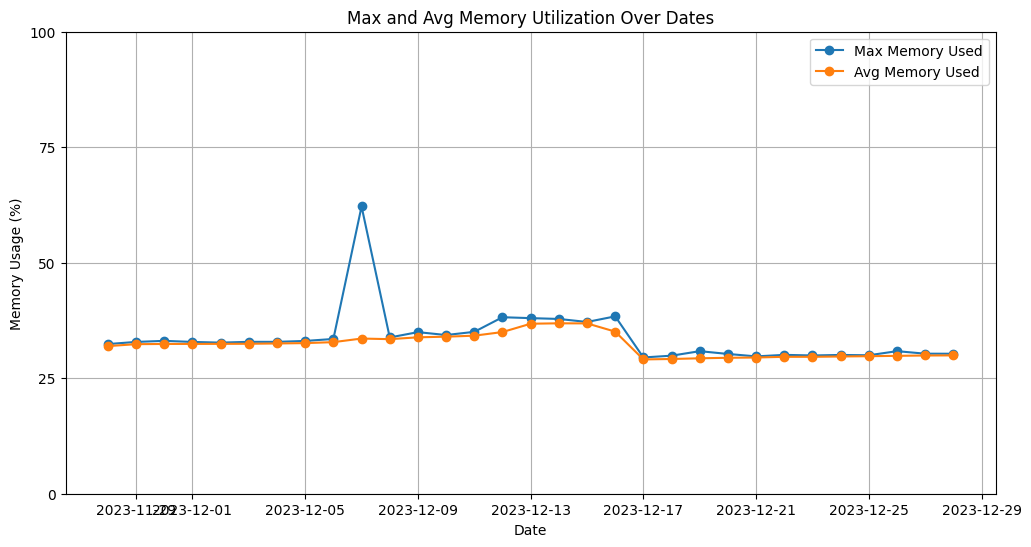

In [90]:
df_memory['timestamp'] = pd.to_datetime(df_memory['timestamp'])  # Convert timestamp to datetime format


df_memory['date'] = df_memory['timestamp'].dt.date
unique_dates = df_memory['date'].drop_duplicates()


# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df_memory['timestamp'], df_percent_max , marker='o', linestyle='-', label='Max Memory Used')
plt.plot(df_memory['timestamp'], df_percent_mean , marker='o', linestyle='-', label='Avg Memory Used')
plt.title('Max and Avg Memory Utilization Over Dates')
plt.xlabel('Date')
plt.ylabel('Memory Usage (%)')
plt.yticks(range(0, 101, 25))
plt.legend()
plt.grid(True)
plt.show()

HDFS

In [109]:
url = "http://10.10.10.200:7180/api/v33/timeseries"


params = {
    "contentType": "application/json",
    "from": '2023-11-23T00:00:00.000Z',
    "desiredRollup": "DAILY",
    "mustUseDesiredRollup": True,
    "query": "select dfs_capacity, dfs_capacity_used, dfs_capacity_used_non_hdfs where entityName=hdfs",
    "to": '2023-12-22T00:00:00.000Z',
}
response = requests.get(url, params=params,auth=HTTPBasicAuth(username, password))
if response.status_code == 200:
    data = response.json()

    dfs_capacity_timestamps = []
    dfs_capacity_values = []
    dfs_capacity_means = []
    dfs_capacity_maxs = []


    dfs_capacity_used_timestamps = []
    dfs_capacity_used_values = []
    dfs_capacity_used_means = []
    dfs_capacity_used_maxs = []
    
    dfs_capacity_used_non_hdfs_timestamp = []
    dfs_capacity_used_non_hdfs_values = []
    dfs_capacity_used_non_hdfs_means = []
    dfs_capacity_used_non_hdfs_maxs = []
   
    for item in data["items"]:
        for time_series in item["timeSeries"]:
            if time_series["metadata"]["metricName"] == "dfs_capacity":

                for data_point in time_series["data"]:
                    timestamp = data_point["timestamp"]
                    value = data_point["value"]
                    mean = data_point['aggregateStatistics']['mean']
                    max = data_point['aggregateStatistics']['max']
                    dfs_capacity_timestamps.append(timestamp)
                    dfs_capacity_values.append(value)
                    dfs_capacity_means.append(mean)
                    dfs_capacity_maxs.append(max)
            
            elif  time_series["metadata"]["metricName"] == "dfs_capacity_used":

                for data_point in time_series["data"]:
                    timestamp = data_point["timestamp"]
                    value = data_point["value"]
                    mean = data_point['aggregateStatistics']['mean']
                    max = data_point['aggregateStatistics']['max']
                    dfs_capacity_used_timestamps.append(timestamp)
                    dfs_capacity_used_values.append(value)
                    dfs_capacity_used_means.append(mean)
                    dfs_capacity_used_maxs.append(max)
            
            elif  time_series["metadata"]["metricName"] == "dfs_capacity_used_non_hdfs":
                for data_point in time_series["data"]:
                    timestamp = data_point["timestamp"]
                    value = data_point["value"]
                    mean = data_point['aggregateStatistics']['mean']
                    max = data_point['aggregateStatistics']['max']
                    dfs_capacity_used_non_hdfs_timestamp.append(timestamp)
                    dfs_capacity_used_non_hdfs_values.append(value)
                    dfs_capacity_used_non_hdfs_means.append(mean)
                    dfs_capacity_used_non_hdfs_maxs.append(max)
                

    # Create a DataFrame
    dfs_capacity_used = pd.DataFrame({
        "timestamp": dfs_capacity_used_timestamps,
        "value": dfs_capacity_used_values,
        "mean":dfs_capacity_used_means,
        "max":dfs_capacity_used_maxs
    })

    dfs_capacity = pd.DataFrame({
        "timestamp": dfs_capacity_timestamps,
        "value": dfs_capacity_values,
        "means":dfs_capacity_means,
        "max":dfs_capacity_maxs
    })

    dfs_capacity_used_non_hdfs = pd.DataFrame({
        "timestamp": dfs_capacity_used_non_hdfs_timestamp,
        "value": dfs_capacity_used_non_hdfs_values,
        "means":dfs_capacity_used_non_hdfs_means,
        "max":dfs_capacity_used_non_hdfs_maxs
    })
        
        

 
       

In [110]:
# convert to TB
dfs_capacity_used['max'] = dfs_capacity_used['max'] / 1099511627776 
dfs_capacity['max'] = dfs_capacity['max'] / 1099511627776 
dfs_capacity_used_non_hdfs['max'] = dfs_capacity_used_non_hdfs['max'] / 1099511627776 

In [111]:
dfs_capacity_used['max']

0     2.963945
1     2.964592
2     2.964641
3     2.964710
4     2.966477
5     2.968248
6     2.966512
7     2.963537
8     2.963572
9     2.963555
10    2.963660
11    2.963794
12    2.964281
13    2.969638
14    2.970906
15    2.980527
16    2.989579
17    2.987222
18    2.986706
19    2.987163
20    2.987299
21    2.987394
22    2.987517
23    2.989294
24    2.989025
25    2.989886
26    3.029936
27    3.030026
28    3.027469
29    3.023641
Name: max, dtype: float64

In [112]:
dfs_capacity['max'] 

0     34.212512
1     34.212512
2     34.212512
3     34.212512
4     34.212512
5     34.212512
6     34.212512
7     34.212512
8     34.212512
9     34.212512
10    34.212512
11    34.212512
12    34.212512
13    34.212512
14    34.212512
15    34.212512
16    34.212512
17    34.212512
18    34.212512
19    34.212512
20    34.212512
21    34.212512
22    34.212512
23    34.212512
24    34.212512
25    34.212512
26    34.212512
27    34.212512
28    34.212512
29    34.212512
Name: max, dtype: float64

In [113]:
dfs_capacity['timestamp'] = pd.to_datetime(dfs_capacity['timestamp'])

In [114]:
# find lastest capacity
df_sorted = dfs_capacity.sort_values(by='timestamp', ascending=False)

In [115]:
latest_capacity = df_sorted.iloc[0]['max']

In [116]:
latest_capacity

34.21251215040684

In [117]:
# convert to percent
dfs_capacity_used['max'] = (dfs_capacity_used['max'] * 100 ) / latest_capacity

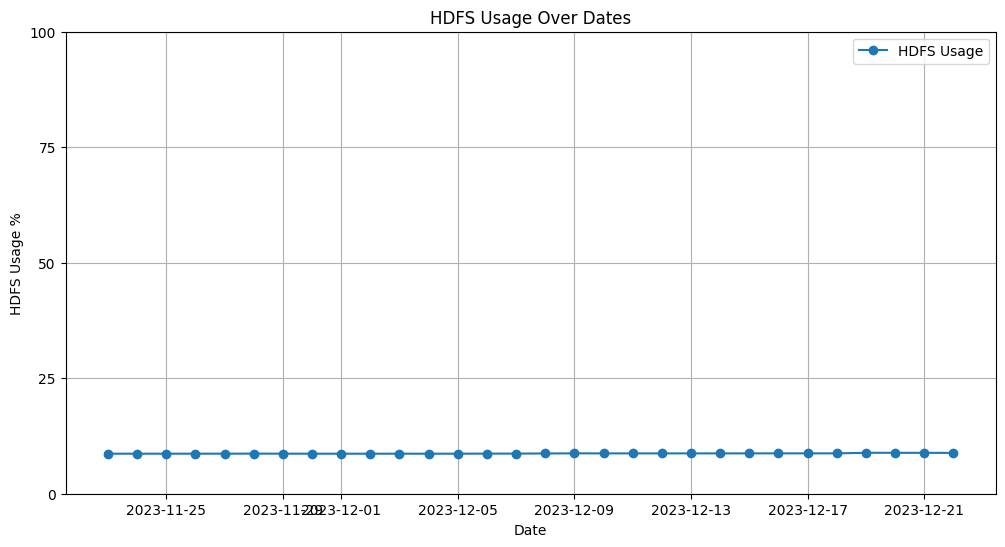

In [120]:
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(dfs_capacity['timestamp'] ,  dfs_capacity_used['max'], marker='o', linestyle='-', label='HDFS Usage')
plt.title('HDFS Usage Over Dates')
plt.xlabel('Date')
plt.ylabel('HDFS Usage %')
plt.legend()
plt.grid(True)
plt.yticks(range(0, 101, 25))
plt.legend()
plt.grid(True)
plt.show()

In [122]:
used_storage = dfs_capacity_used['max'].max() 

In [124]:
used_storage 

8.856485803995229

In [123]:
stored_used = (used_storage / latest_capacity) * 100
stored_remaining = 100 - stored_used
print(f"stored_used = {stored_used} % and stored_remaining = {stored_remaining} %")

stored_used = 25.886686616463244 % and stored_remaining = 74.11331338353676 %


In [127]:
stored_used 

25.886686616463244

HIVE/IMPALA

In [ ]:
hostname = os.getenv('HOSTNAME')
username = os.getenv('USERNAME')
password = os.getenv('PASSWORD')

In [ ]:
import paramiko
ssh_client =paramiko.SSHClient()
ssh_client.set_missing_host_key_policy(paramiko.AutoAddPolicy())
ssh_client.connect(hostname=hostname,port=22,username=username,password=password)

stdin,stdout,stderr=ssh_client.exec_command("hdfs dfs -du -x /user/hive/warehouse")

output_lines = stdout.readlines()

storage_remains = []
storage_useds = []
database_names = []
pattern = r'/warehouse/([^/]+)$'

for line in output_lines:
    print(line)
    storage_used = line.strip().split()
    storage_useds.append(int(storage_used[0]))
#     print(storage_used[2])
    storage_name = re.search(pattern, storage_used[2])
    storage_name = storage_name.group(1)
#     print(f' this is storage_used {storage_used[1]}  this is storage_name {storage_used[2]}')
    database_names.append(storage_name)
    storage_remains.append(int(storage_used[1]))
    
    
#     print(storage_used[1])
   

In [ ]:
size_in_bytes = 194489410115
size_in_gb = size_in_bytes / (1024 ** 3)

In [ ]:
df = {'storage_useds':storage_useds , 'database_name':database_names , 'storage_remain':storage_remains}

In [ ]:
storage_df = pd.DataFrame(df)

In [ ]:
# convert to GB
storage_df['storage_useds'] = storage_df['storage_useds'] / 1073741824
storage_df['storage_remain'] = storage_df['storage_remain'] / 1073741824

In [ ]:
storage_df['storage_remain_TB'] =  storage_df['storage_remain'] /  (1024 ** 4)

In [ ]:
storage_df['storage_used_TB'] =  storage_df['storage_useds'] /  (1024 ** 4)

In [ ]:
# sum of storage and storage_remain TB
storage_use = storage_df['storage_used_TB'].sum()
storage_remain = storage_df['storage_remain_TB'].sum()

In [ ]:
percentage_used = (storage_use / storage_remain) * 100

In [ ]:
percent_remain = 100 - percentage_used

In [ ]:
storage_df['unit'] = storage_df['storage_useds'].apply(lambda x: 'TB' if x >= 1024 else 'GB')

In [ ]:
storage_df['storage_useds'] = storage_df['storage_useds'].apply(lambda x: x / 1024 if x >= 1024 else x)

In [ ]:
top5_storage_useds = storage_df.sort_values(by='storage_useds', ascending=False).head(5)